In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create the model
import tensorflow as tf

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
data = {
    'train': mnist.train,
    'validation': mnist.validation,
    'test': mnist.test
}

FEATURES_count = data['train'].images.shape[1] # 784 pixels
CLASSES_count = data['train'].labels.shape[1] # 10 digits
EXAMPLES_count = data['train'].images.shape[0] # 5000 images (val), 55000 images (train), 10000 images (test)


HIDDEN_UNITS = 1024




In [5]:
%run display.py


In [10]:

X = tf.placeholder(tf.float32, [None, FEATURES_count])
Y = tf.placeholder(tf.float32, [None, CLASSES_count])


randInit = tf.contrib.layers.xavier_initializer(uniform=False, seed=None)

link = lambda z: tf.nn.softmax(z)



Theta1 = tf.get_variable("Theta0", [FEATURES_count, HIDDEN_UNITS], initializer=randInit)
biases1 = tf.get_variable("biases0", [HIDDEN_UNITS], initializer=randInit)
# Theta2 = tf.get_variable("Theta2", [HIDDEN_UNITS, CLASSES_count], initializer=randInit)
# biases2 = tf.get_variable("biases2", [CLASSES_count], initializer=randInit)



# Theta = tf.transpose(tf.matmul(Theta1, Theta2))

A = link(tf.matmul(X, Theta1) + biases1)


#%%
init = tf.global_variables_initializer()

saver = tf.train.Saver({
    "Theta1": Theta1,
    "biases1": biases1,
#     "Theta2": Theta2,
#     "biases2": biases2,
})

#%%
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    saver.restore(sess, "./saved_params/model.ckpt")
  
#     def report(dataset, description='DATASET', prepend='', append=''):
#         print(
#             '  ' + 
#             description + 
#             ' ... ' + 
#             prepend + 
#             '\tCost: {:018.16f} \tAccuracy: {:06.3f}%  '.format( *sess.run([cost,accuracy], feed_dict={X: dataset.images, Y: dataset.labels}) ) + 
#             append  
#         ) 
    

    # Test trained model
#     report(data['test'], 'TESTING .....')
    # print('Test Accuracy: {:.3f}%'.format( sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels}) ) ) # 91.050%




ValueError: Variable Theta0 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\makombo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\makombo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\makombo\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


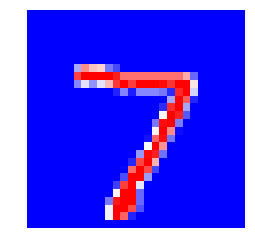

In [18]:
 disp(mnist.test.images[0:1,:])
